<a href="https://colab.research.google.com/github/2220Palmer/Data747Student/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')


/tmp/ipython-input-3430518703.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='Blues')


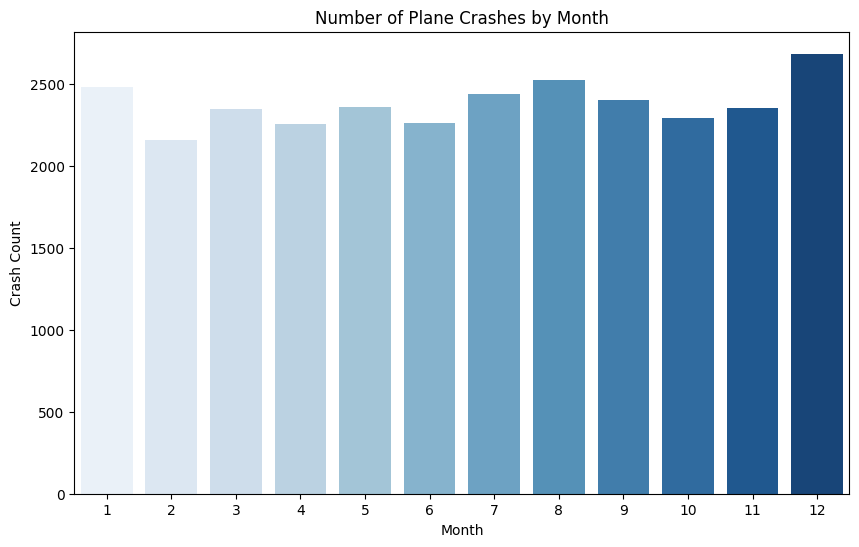

/tmp/ipython-input-3430518703.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month_Name', data=df, order=calendar.month_name[1:], palette='Blues')


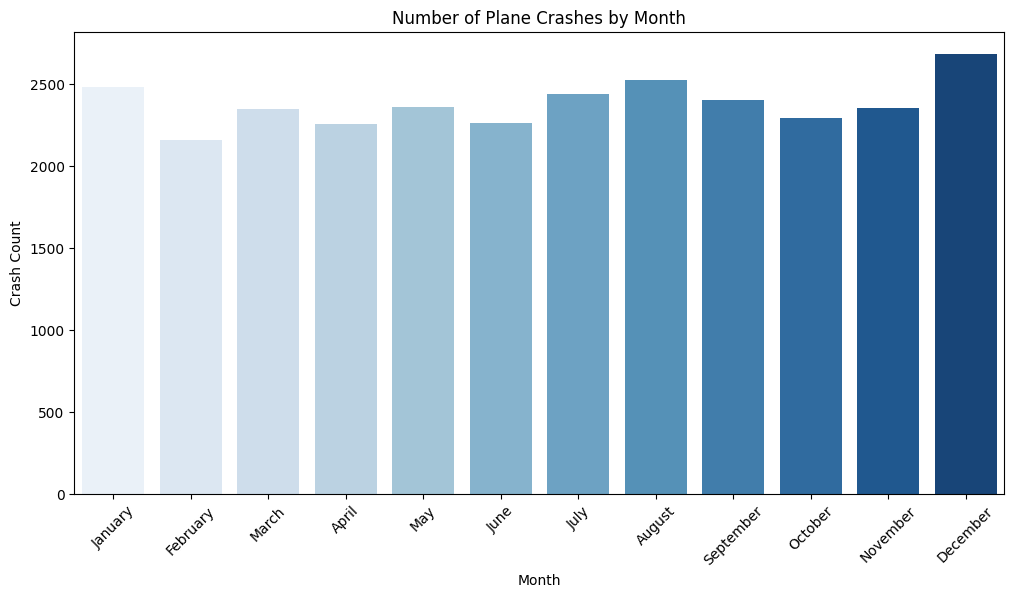

/tmp/ipython-input-3430518703.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total fatalities', data=fatalities_by_year, palette='Greens')


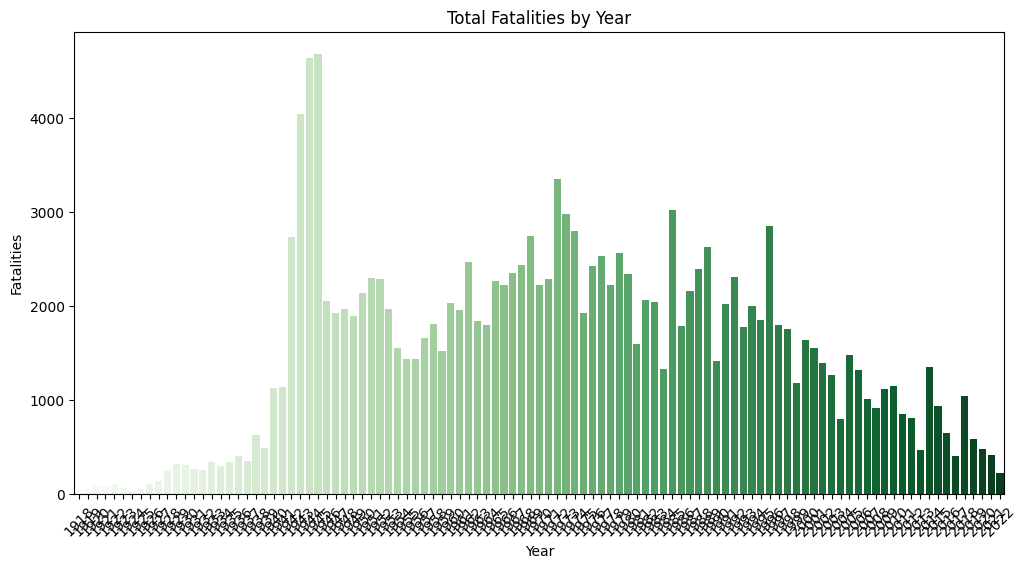

/tmp/ipython-input-3430518703.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Decade', y='Total fatalities', data=fatalities_by_decade, palette='Purples')


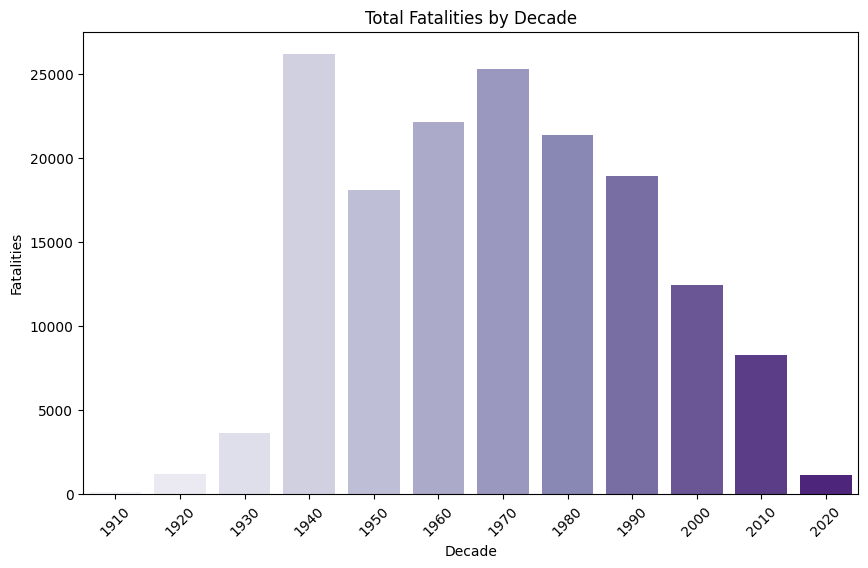

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Plane Crashes.csv', encoding='ISO-8859-1')

# Step 3: Inspect columns (optional, helps confirm names)
print(df.columns)

# Step 4: Convert Date column to datetime
# Adjust column name if needed (e.g., 'Accident Date')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 5: Extract Month and Year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Step 6: Bar graph - Month vs Crash Counts
plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=df, palette='Blues')
plt.title('Number of Plane Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Crash Count')
plt.show()

import calendar

# Step: Add month names
df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_name[x] if pd.notnull(x) else x)

# Bar graph - Month vs Crash Counts (with names)
plt.figure(figsize=(12,6))
sns.countplot(x='Month_Name', data=df, order=calendar.month_name[1:], palette='Blues')
plt.title('Number of Plane Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.show()

df.columns

# Step 11: Bar graph - Year vs Total Fatalities
plt.figure(figsize=(12,6))

# Group by Year and sum total fatalities
fatalities_by_year = df.groupby('Year')['Total fatalities'].sum().reset_index()

# Plot
sns.barplot(x='Year', y='Total fatalities', data=fatalities_by_year, palette='Greens')
plt.title('Total Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.show()

# Create decade bins
df['Decade'] = (df['Year'] // 10) * 10
df['Decade'] = df['Decade'].astype('Int64')  # handles missing years gracefully

# Group by Decade and sum fatalities
fatalities_by_decade = df.groupby('Decade')['Total fatalities'].sum().reset_index()

# Plot - Fatalities by Decade
plt.figure(figsize=(10,6))
sns.barplot(x='Decade', y='Total fatalities', data=fatalities_by_decade, palette='Purples')
plt.title('Total Fatalities by Decade')
plt.xlabel('Decade')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.show()








In [ ]:
!ls


'Plane Crashes.csv'   sample_data


In [ ]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing critical fields (like Date or Location)
df = df.dropna(subset=['Date', 'Crash location'])

# Convert Date column (if not already done)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract useful features
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Decade'] = (df['Year'] // 10) * 10

# Convert numeric columns to proper types
numeric_cols = ['Crew fatalities', 'PAX fatalities', 'Other fatalities', 'Total fatalities']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')



/tmp/ipython-input-1908378386.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipython-input-1908378386.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
/tmp/ipython-input-1908378386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

/tmp/ipython-input-3777414072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_operators.index, y=top_operators.values, palette='Blues')


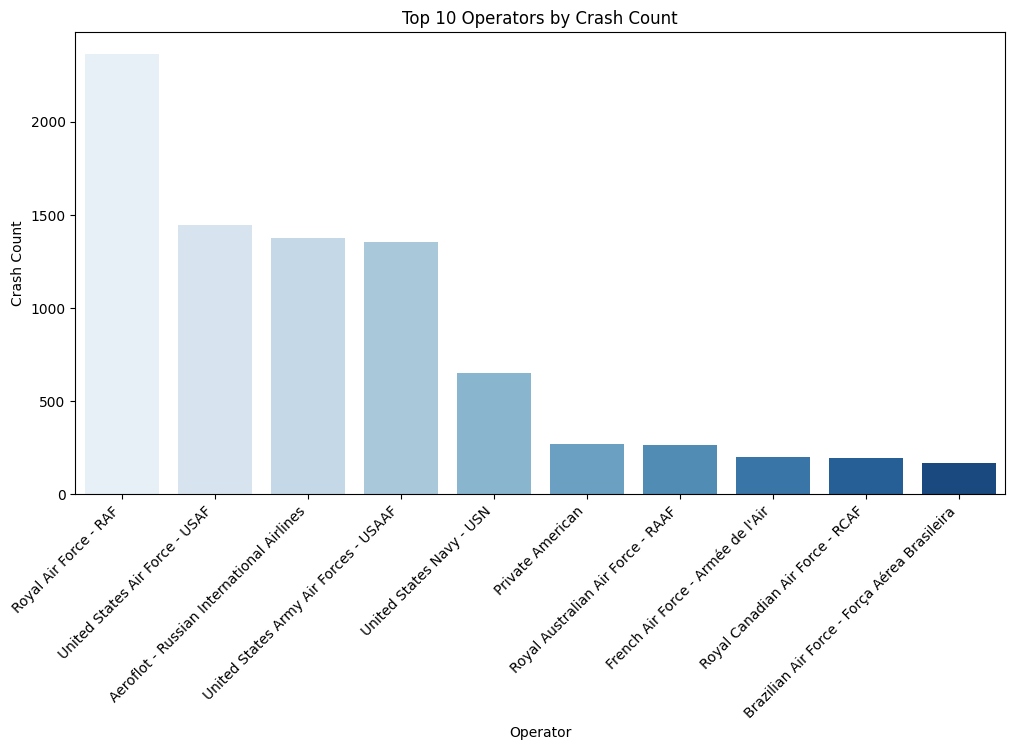

In [ ]:
plt.figure(figsize=(12,6))
top_operators = df['Operator'].value_counts().nlargest(10)
sns.barplot(x=top_operators.index, y=top_operators.values, palette='Blues')
plt.title('Top 10 Operators by Crash Count')
plt.xlabel('Operator')
plt.ylabel('Crash Count')
plt.xticks(rotation=45, ha='right')
plt.show()


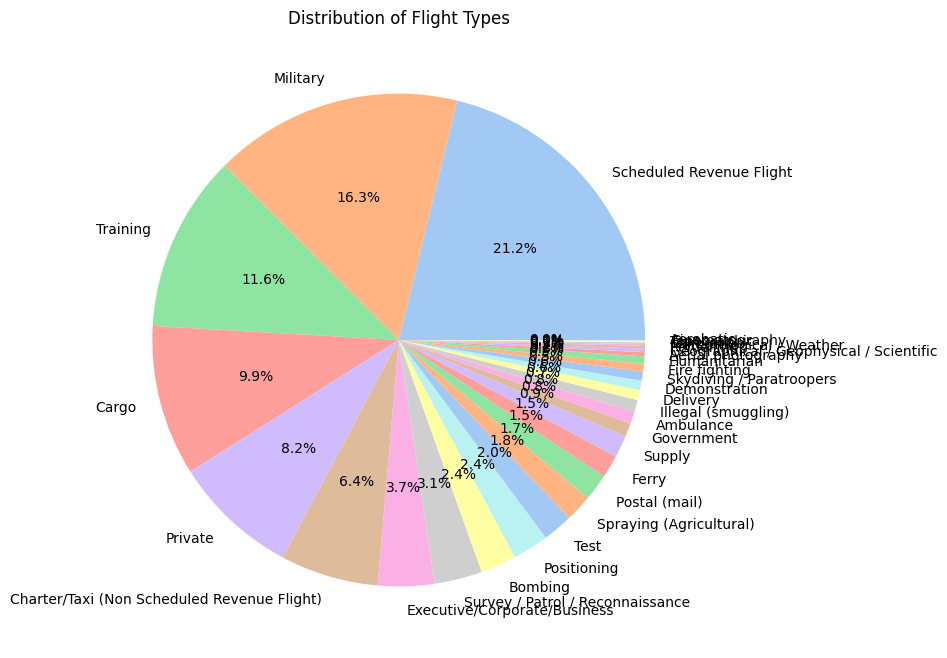

In [ ]:
plt.figure(figsize=(8,8))
df['Flight type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Flight Types')
plt.ylabel('')
plt.show()

# Step 1: Count flight types
flight_counts = df['Flight type'].value_counts()

# Step 2: Group small categories into "Other"
threshold = 0.02 * flight_counts.sum()  # 2% threshold
flight_counts_grouped = flight_counts.copy()
flight_counts_grouped[flight_counts < threshold] = 0  # temporarily zero out small ones

# Step 3: Create new series with "Other"
flight_counts_grouped = flight_counts_grouped[flight_counts_grouped > 0]
other_total = flight_counts[flight_counts < threshold].sum()
flight_counts_grouped['Other'] = other_total

# Step 4: Plot pie chart
plt.figure(figsize=(8,8))
flight_counts_grouped.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Grouped Flight Type Distribution')
plt.ylabel('')
plt.show()



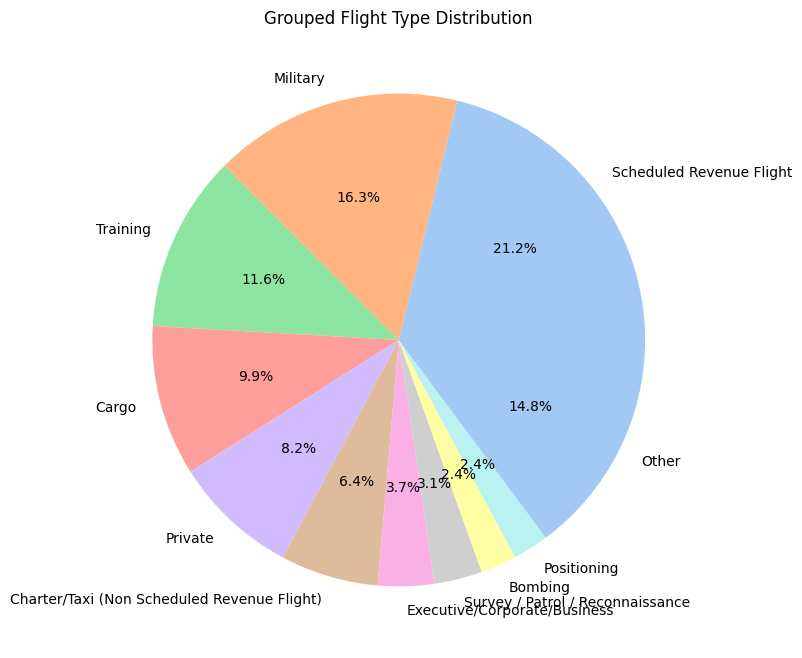

In [ ]:
# Step 1: Count flight types
flight_counts = df['Flight type'].value_counts()

# Step 2: Group small categories into "Other"
threshold = 0.02 * flight_counts.sum()  # 2% threshold
flight_counts_grouped = flight_counts.copy()
flight_counts_grouped[flight_counts < threshold] = 0  # temporarily zero out small ones

# Step 3: Create new series with "Other"
flight_counts_grouped = flight_counts_grouped[flight_counts_grouped > 0]
other_total = flight_counts[flight_counts < threshold].sum()
flight_counts_grouped['Other'] = other_total

# Step 4: Plot pie chart
plt.figure(figsize=(8,8))
flight_counts_grouped.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Grouped Flight Type Distribution')
plt.ylabel('')
plt.show()


/tmp/ipython-input-3272838469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Flight phase', y='Total fatalities', data=df, palette='Reds')


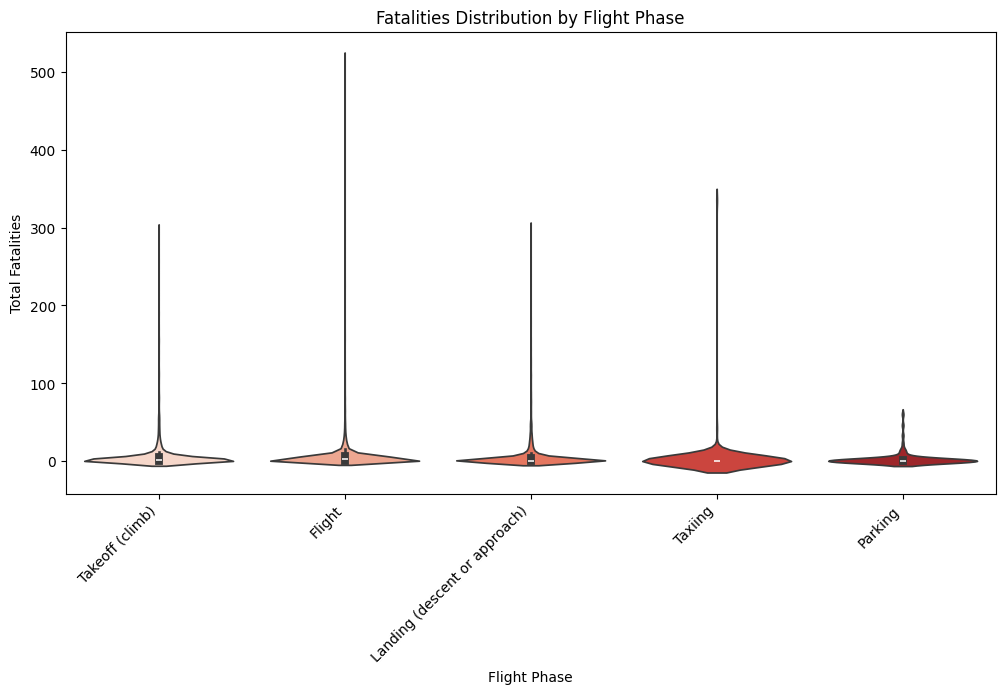

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Flight phase', y='Total fatalities', data=df, palette='Reds')
plt.title('Fatalities Distribution by Flight Phase')
plt.xlabel('Flight Phase')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45, ha='right')
plt.show()


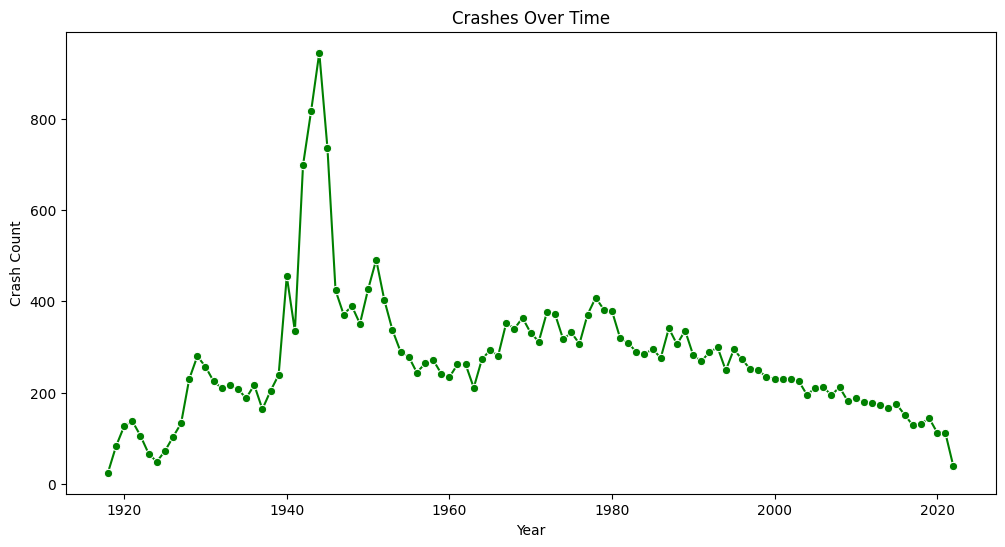

In [ ]:
plt.figure(figsize=(12,6))
crashes_per_year = df.groupby('Year').size().reset_index(name='Crash Count')
sns.lineplot(x='Year', y='Crash Count', data=crashes_per_year, marker='o', color='green')
plt.title('Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.show()


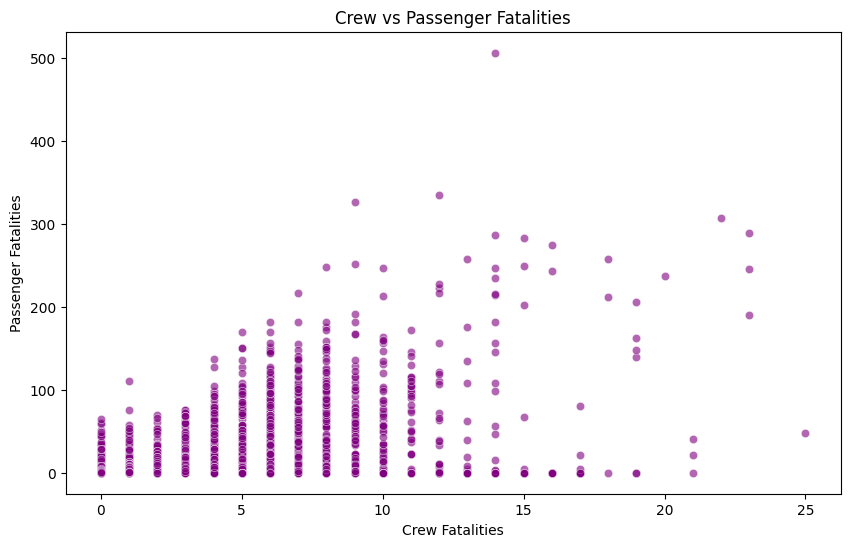

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Crew fatalities', y='PAX fatalities', data=df, alpha=0.6, color='purple')
plt.title('Crew vs Passenger Fatalities')
plt.xlabel('Crew Fatalities')
plt.ylabel('Passenger Fatalities')
plt.show()


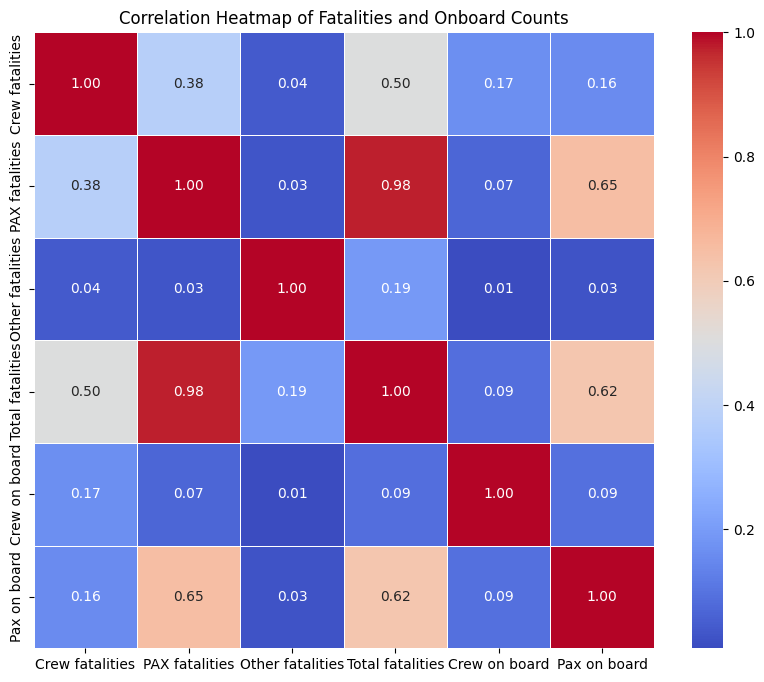

In [ ]:
# Select relevant numeric columns
numeric_cols = ['Crew fatalities', 'PAX fatalities', 'Other fatalities',
                'Total fatalities', 'Crew on board', 'Pax on board']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Fatalities and Onboard Counts')
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

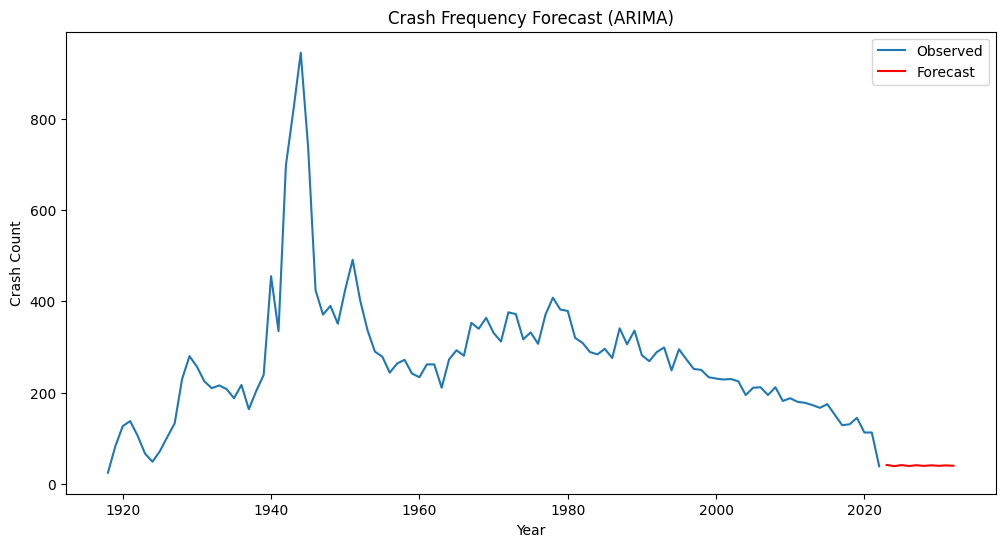

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare yearly crash counts
crashes_per_year = df.groupby('Year').size()

# Fit ARIMA model
model = ARIMA(crashes_per_year, order=(1,1,1))
model_fit = model.fit()

# Forecast next 10 years
forecast = model_fit.forecast(steps=10)

# Plot
plt.figure(figsize=(12,6))
plt.plot(crashes_per_year.index, crashes_per_year.values, label='Observed')
plt.plot(range(crashes_per_year.index[-1]+1, crashes_per_year.index[-1]+11), forecast, label='Forecast', color='red')
plt.title('Crash Frequency Forecast (ARIMA)')
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.legend()
plt.show()


In [ ]:
print(y_train.value_counts())

Survival
0    19463
Name: count, dtype: int64


In [ ]:
# Redo train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Confirm class balance
print("Training class distribution:")
print(y_train.value_counts())


Training class distribution:
Survival
0    19463
Name: count, dtype: int64


In [ ]:
# Step 1: Filter to rows with valid survival outcome
df_model = df.copy()
df_model['Survivors'] = pd.to_numeric(df_model['Survivors'], errors='coerce').fillna(0)
df_model['Survival'] = df_model['Survivors'].apply(lambda x: 1 if x > 0 else 0)

# Step 2: Keep only rows where Survival is 0 or 1
df_model = df_model[df_model['Survival'].isin([0, 1])]

# Step 3: Check class balance
print("Full dataset class distribution:")
print(df_model['Survival'].value_counts())


Full dataset class distribution:
Survival
0    28524
Name: count, dtype: int64


In [ ]:
print(df['Survivors'].value_counts(dropna=False))


Survivors
0.0    28524
Name: count, dtype: int64


In [ ]:
# Prepare features and target
X_raw = df[['Crew on board', 'Pax on board', 'Flight phase', 'Flight type']].dropna()
y = df.loc[X_raw.index, 'Total fatalities']
X = pd.get_dummies(X_raw, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit regression model
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predict and evaluate
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = reg.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 4.346037301863726
R² Score: 0.44104926138455225


/tmp/ipython-input-1816928952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Severity'] = df['Total fatalities'].apply(lambda x: 'High' if x > 50 else 'Low')


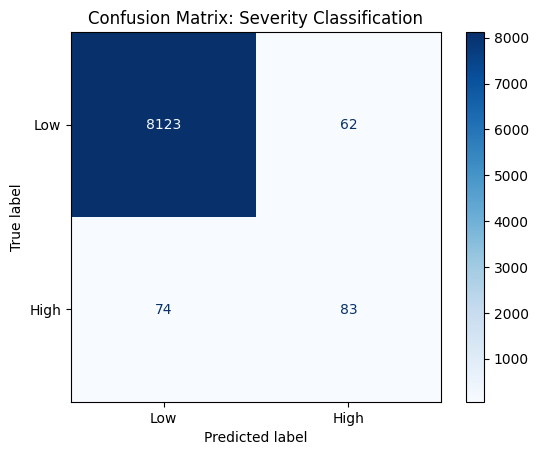

In [ ]:
# Create severity levels based on total fatalities
df['Severity'] = df['Total fatalities'].apply(lambda x: 'High' if x > 50 else 'Low')

# Encode target
y = df['Severity']
X_raw = df[['Crew on board', 'Pax on board', 'Flight phase', 'Flight type']].dropna()
X = pd.get_dummies(X_raw, drop_first=True)
y = y.loc[X.index]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Fit model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'High'])

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Severity Classification')
plt.show()


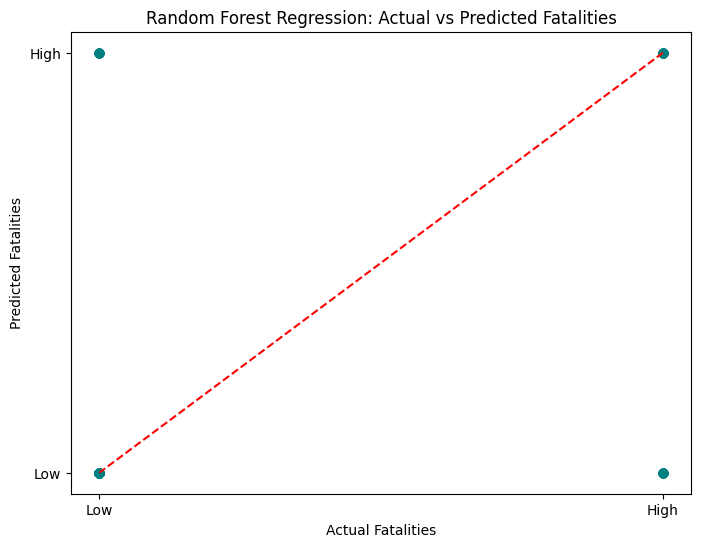

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted fatalities
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° reference line
plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.title('Random Forest Regression: Actual vs Predicted Fatalities')
plt.show()


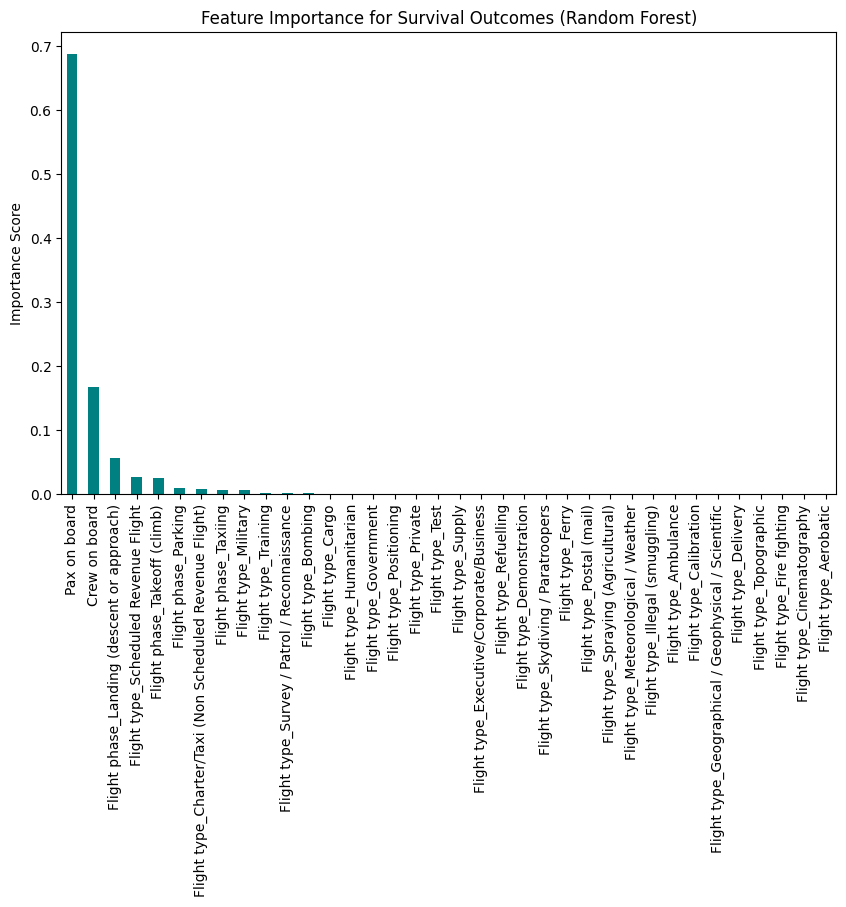

In [ ]:
from sklearn.ensemble import RandomForestClassifier
importances = {}

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
importances.plot(kind='bar', color='teal')
plt.title('Feature Importance for Survival Outcomes (Random Forest)')
plt.ylabel('Importance Score')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low','High'])
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='High')
recall = recall_score(y_test, y_pred, pos_label='High')
f1 = f1_score(y_test, y_pred, pos_label='High')

print("Accuracy:", accuracy)
print("Precision (High severity):", precision)
print("Recall (High severity):", recall)
print("F1 Score (High severity):", f1)


Confusion Matrix:
 [[8123   62]
 [  74   83]]
Accuracy: 0.9836969551666267
Precision (High severity): 0.5724137931034483
Recall (High severity): 0.5286624203821656
F1 Score (High severity): 0.5496688741721855
